In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
spotify_data = pd.read_csv("Spotify_data.csv")

In [5]:
spotify_data .columns

Index(['Unnamed: 0', 'Track Name', 'Artists', 'Album Name', 'Album ID',
       'Track ID', 'Popularity', 'Release Date', 'Duration (ms)', 'Explicit',
       'External URLs', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo'],
      dtype='object')

In [6]:
spotify_data .head(10)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.01070,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.02920,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.35900,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.03750,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.02290,0.000001,0.3110,0.844,151.019
5,5,Type Shit,"Future, Metro Boomin, Travis Scott, Playboi Carti",WE DON'T TRUST YOU,4iqbFIdGOTzXeDtt9owjQn,28drn6tQo95MRvO0jQEo5C,88,2024-03-22,228267,True,...,0.552,2,-5.679,1,0.1290,0.02150,0.000000,0.1190,0.112,144.941
6,6,CARNIVAL,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",VULTURES 1,30zwjSQEodaUXCn11nmiVF,3w0w2T288dec0mgeZZqoNN,87,2024-02-09,264324,True,...,0.811,1,-5.746,1,0.1590,0.18900,0.000000,0.3390,0.311,148.144
7,7,Prada,"cassö, RAYE, D-Block Europe",Prada,5MU0RmBSpoSxOPYBfcobDc,59NraMJsLaMCVtwXTSia8i,87,2023-08-11,132359,True,...,0.717,8,-5.804,1,0.0375,0.00100,0.000002,0.1130,0.422,141.904
8,8,euphoria,Kendrick Lamar,euphoria,32bR4LcEc1PvJEhaKoo4ZN,77DRzu7ERs0TX3roZcre7Q,88,2024-04-30,383639,True,...,0.643,1,-5.002,1,0.1100,0.04600,0.000000,0.0840,0.142,139.948
9,9,redrum,21 Savage,american dream,2RRYaYHY7fIIdvFlvgb5vq,52eIcoLUM25zbQupAZYoFh,87,2024-01-12,270698,True,...,0.733,2,-8.757,1,0.0488,0.00598,0.000983,0.3750,0.244,172.090


In [7]:
spotify_data .info

<bound method DataFrame.info of      Unnamed: 0                               Track Name  \
0             0                              Not Like Us   
1             1                                  Houdini   
2             2               BAND4BAND (feat. Lil Baby)   
3             3                       I Don't Wanna Wait   
4             4                                    Pedro   
..          ...                                      ...   
222         222                               Tu Chahiye   
223         223             Aabaad Barbaad (From "Ludo")   
224         224                             Jag Ghoomeya   
225         225  Tumhe Kitna Pyaar Karte (From "Bawaal")   
226         226                                Bekhayali   

                                               Artists  \
0                                       Kendrick Lamar   
1                                               Eminem   
2                                Central Cee, Lil Baby   
3              

In [ ]:
spotify_data .tail(10)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
217,217,Khamoshiyan,"Jeet Gannguli, Arijit Singh",Khamoshiyan (Original Motion Picture Soundtrack),6mJIpY6r2SzZbLN3ClYCbb,6zCQF5tu7HVwU9shhKqiuF,65,2014-12-29,335710,False,...,0.521,2,-6.837,0,0.0272,0.631,0.000000,0.1580,0.266,143.892
218,218,"Naseeb Se (From ""Satyaprem Ki Katha"")","Payal Dev, Vishal Mishra, A.M. Turaz","Naseeb Se (From ""Satyaprem Ki Katha"")",0wjqUAQ7YkdRqTcDjzkepU,3dpM3ijJz0vGzbkh5DcMXz,68,2023-05-27,184312,False,...,0.599,9,-6.309,0,0.0447,0.556,0.000001,0.1030,0.392,149.785
219,219,Nazar Na Lag Jaaye,"Ash King, Sachin-Jigar",Stree,2Z1LgolP3fqxEJ89MS7n9C,0EPTGML5v37lIp97WBMMvD,57,2018-08-22,206175,False,...,0.622,7,-8.172,0,0.0842,0.700,0.000003,0.1260,0.672,173.709
220,220,Sapna Jahan,"Ajay-Atul, Sonu Nigam, Neeti Mohan",Brothers (Original Motion Picture Soundtrack),383e45grHa4YKHGRojMqYy,5PM1dIibpTR57jlugvjNSM,57,2015-07-24,341780,False,...,0.329,0,-11.958,0,0.0312,0.780,0.002100,0.1170,0.144,126.107
221,221,Tere Bin,"Rahat Fateh Ali Khan, Asees Kaur, Tanishk Bagchi",Simmba,3dynRTuVOrAr5O7srr2txN,4Y1Sd0fSSxHEMrWkd2x3EW,58,2018-12-27,230948,False,...,0.716,7,-3.936,1,0.0384,0.268,0.000005,0.6030,0.639,86.949
222,222,Tu Chahiye,"Pritam, Atif Aslam",Bajrangi Bhaijaan,4nZOPP0atfJbBlkedLYi7t,3aaiAWCet6sbfOfLSn3g7i,66,2015-07-07,272680,False,...,0.744,7,-5.817,1,0.0446,0.403,0.000000,0.0853,0.415,134.068
223,223,"Aabaad Barbaad (From ""Ludo"")","Pritam, Arijit Singh","Aabaad Barbaad (From ""Ludo"")",1PzsfgcbPbiW7uflc9Zi5Z,0hFUtSsV2itYEUTZGj6w5H,58,2020-10-21,309103,False,...,0.522,7,-5.857,1,0.0317,0.686,0.000000,0.4100,0.628,118.001
224,224,Jag Ghoomeya,"Vishal-Shekhar, Rahat Fateh Ali Khan, Irshad K...",Sultan,0tAi6H8acUKefYMIEuxcMA,4KCbZcshgibfJSCAkg87Lv,62,2016-05-31,281992,False,...,0.565,11,-7.954,1,0.0347,0.479,0.000002,0.1050,0.607,82.653
225,225,"Tumhe Kitna Pyaar Karte (From ""Bawaal"")","Mithoon, Arijit Singh, Manoj Muntashir","Tumhe Kitna Pyaar Karte (From ""Bawaal"")",20zQZcEhMLsDUn1LhPCEFY,03hJuEQpEQERrHpjcXKWzJ,65,2023-07-07,305232,False,...,0.374,10,-9.849,0,0.0328,0.924,0.000008,0.0840,0.388,101.855
226,226,Bekhayali,Sachet Tandon,Kabir Singh,3uuu6u13U0KeVQsZ3CZKK4,4yMbbysldl7E3WgiaugnwM,61,2019-06-14,371791,False,...,0.582,9,-5.180,0,0.0413,0.449,0.000000,0.3190,0.365,168.400


In [28]:
print(spotify_data.head())

   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

In [29]:
if 'unnamed:0' in spotify_data.columns:
    spotify_data.drop(columns=['unnamed:0'],inplace=true)

In [30]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

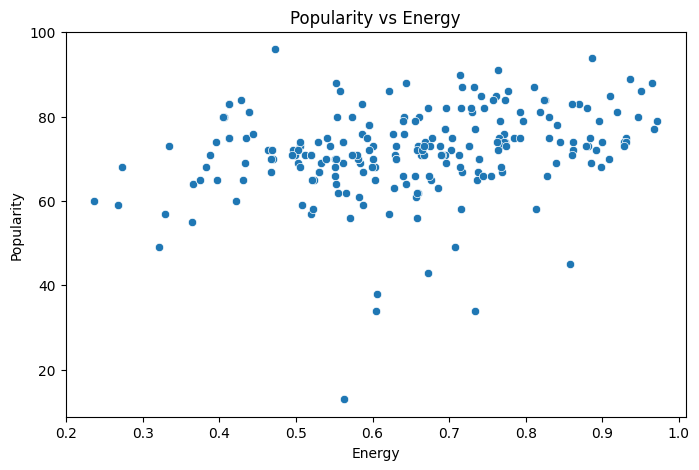

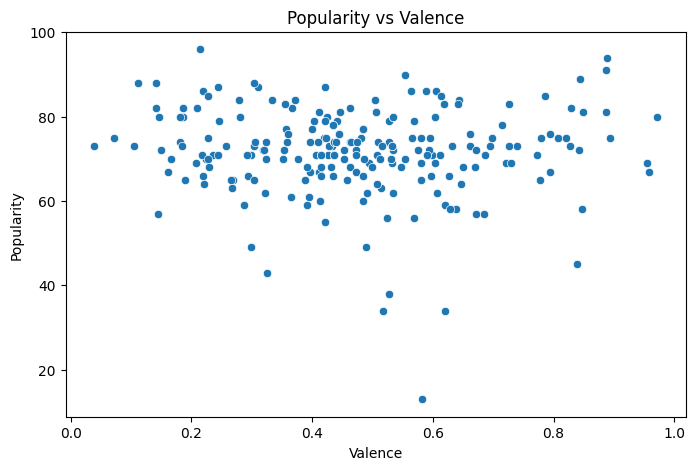

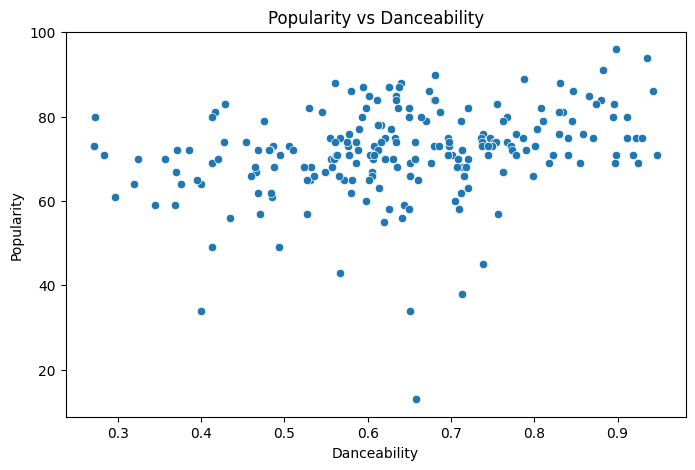

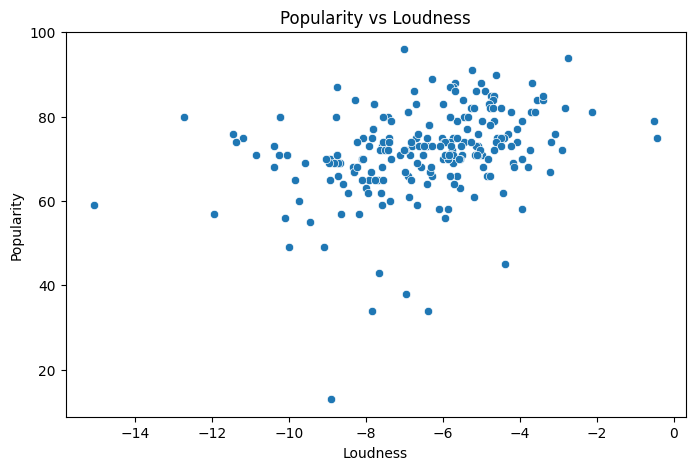

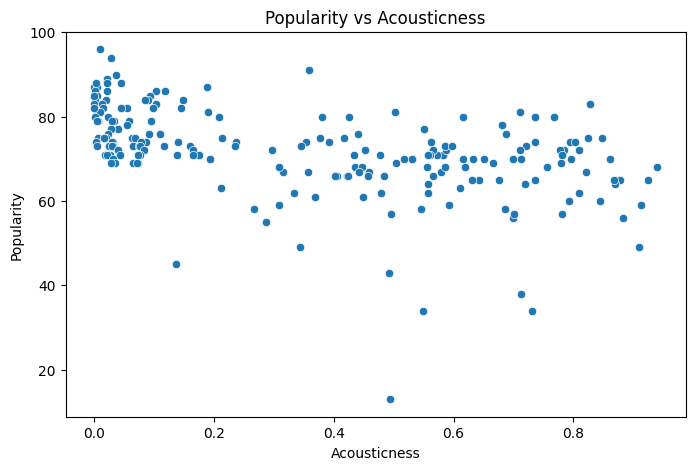

In [33]:
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=spotify_data, x=feature, y='Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()

In [34]:
numeric_columns=spotify_data.select_dtypes(include=['float64','int64']).columns
numeric_data=spotify_data[numeric_columns]

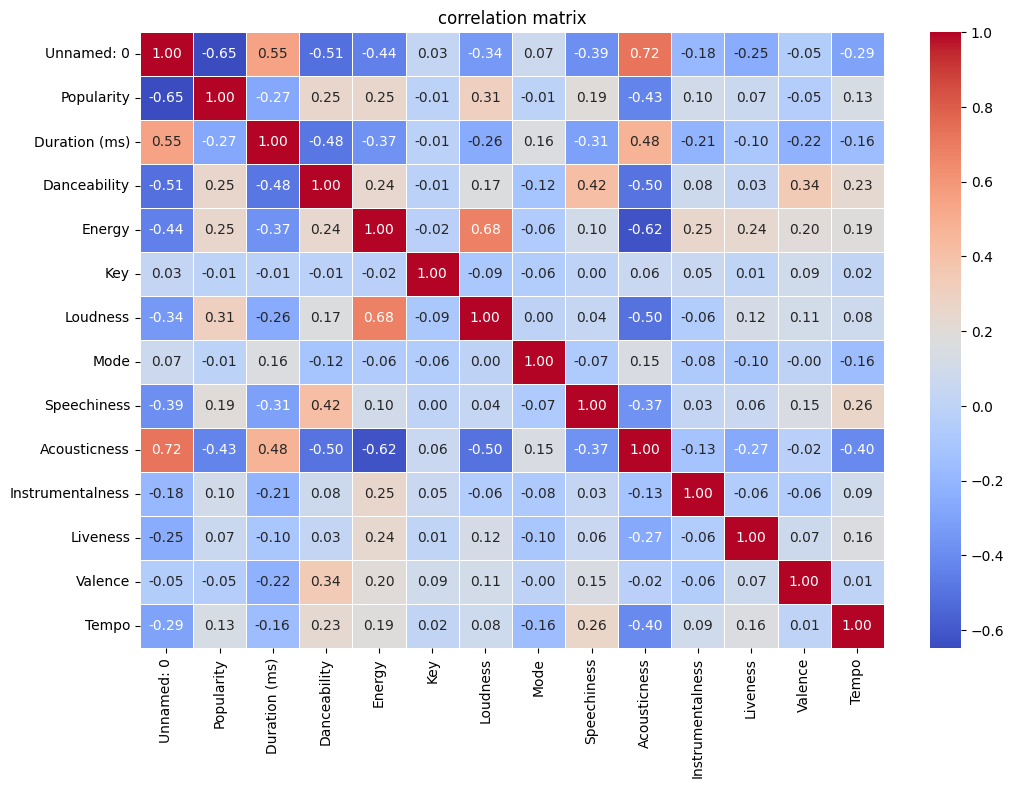

In [35]:
corr_matrix=numeric_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('correlation matrix')
plt.show()

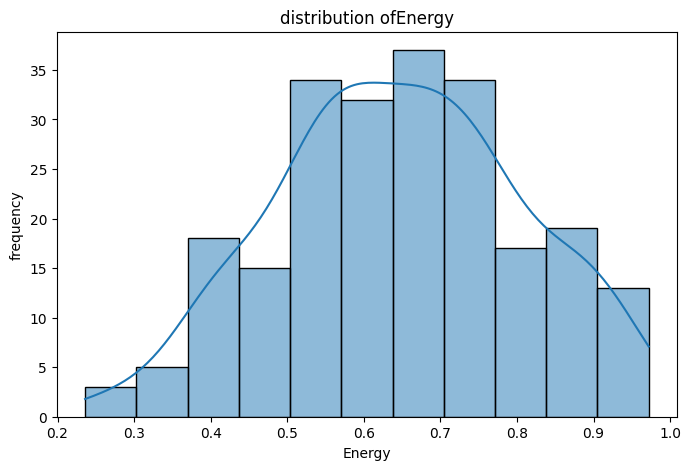

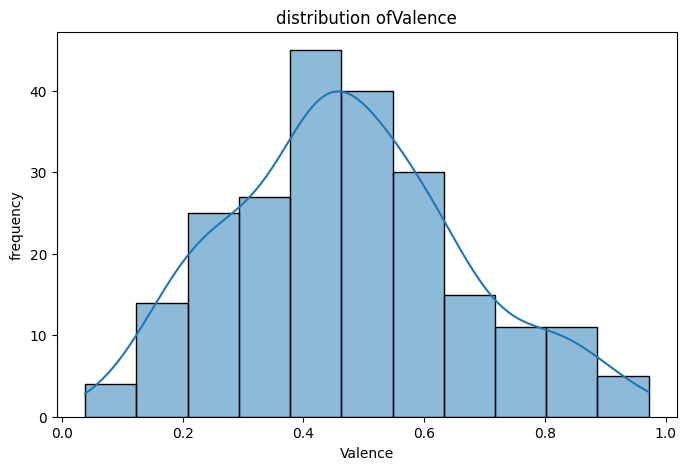

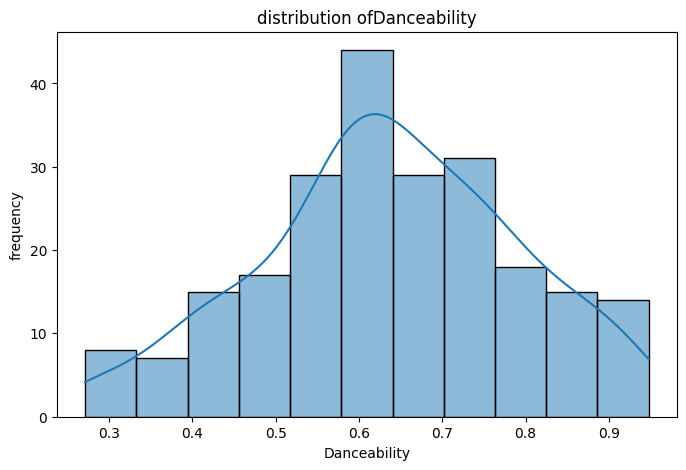

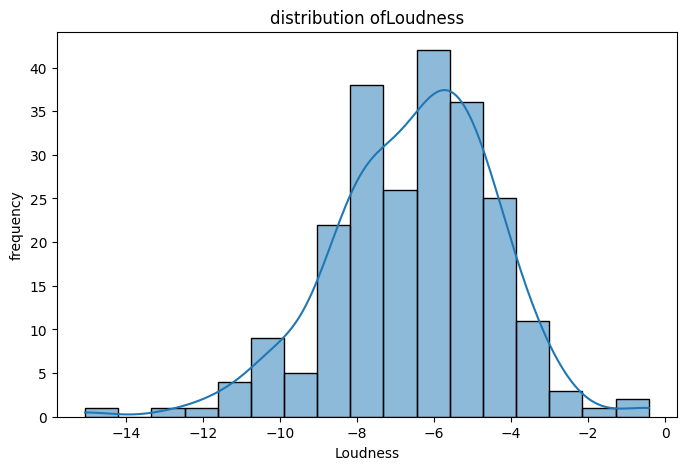

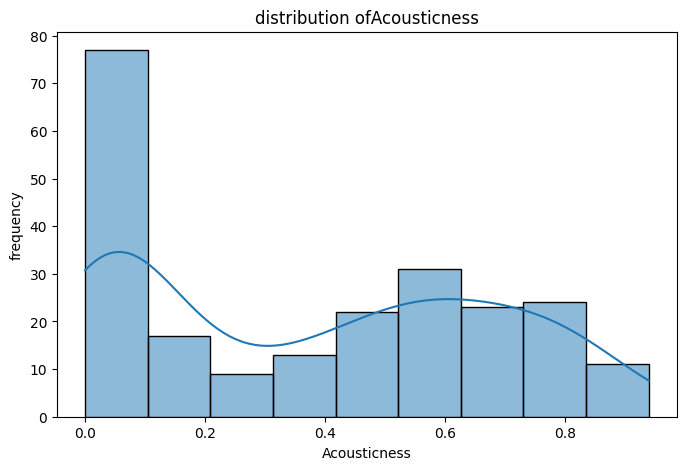

In [37]:
for feature in features:
    plt.figure(figsize=(8,5))
    sns.histplot(spotify_data[feature],kde=True)
    plt.title(f'distribution of{feature}')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

In [39]:
features=['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness','Tempo'
          ,'Speechiness','Liveness']
x=spotify_data[features]
y=spotify_data['Popularity']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [41]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [43]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                     param_grid, refit=True, verbose=2, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    val

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [44]:
best_model_rf=grid_search_rf.best_params_
best_rf_model=grid_search_rf.best_estimator_

In [45]:
y_pred_best_rf=best_rf_model.predict(X_test_scaled)

In [47]:
mse=mean_absolute_error(y_test,y_pred_best_rf)
rmse=mse ** 0.5
r2=r2_score(y_test,y_pred_best_rf)

print(f'best random forest parametrs:{best_params_rf} ')
print(f'root mean squared error:{rmse:2f}')
print(f'r-squared:{r2:.2f}')

best random forest parametrs:{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} 
root mean squared error:2.319739
r-squared:0.32


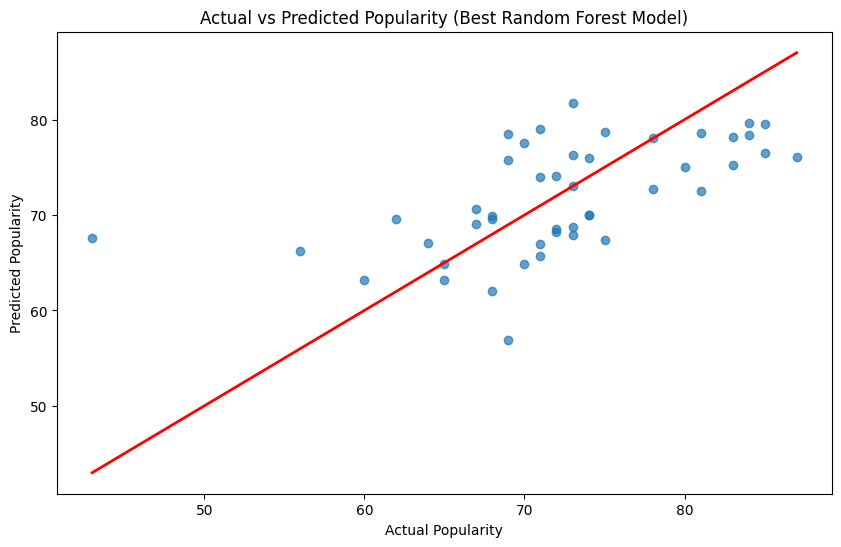

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

In [ ]:
'''Project Title: Music Popularity Prediction with Spotify Data
1. Purpose
Goal: To predict how popular a song will be based on its audio features.

2. Dataset
Source: A CSV file containing various attributes of songs from Spotify.

3. Steps Involved
Load and Explore Data:
Load the dataset and look at the first few rows.
Remove any unnecessary columns.

Visualize Data:
Create scatter plots to see how different features relate to popularity.
Show a correlation matrix to highlight relationships between features.
Display histograms to see the distribution of each feature.

Prepare for Modeling:
Select relevant features and the target variable (popularity).
Split the data into training and testing sets.
Normalize the features to improve model performance.

Train the Model:
Use a Random Forest algorithm to predict popularity.
Perform hyperparameter tuning to find the best model settings.

Evaluate the Model:
Make predictions and calculate how well the model performed using 
metrics like RMSE (Root Mean Squared Error) and R-squared.
Create a plot comparing actual vs. predicted popularity.

4. Results
The model can effectively predict a song's popularity based on its audio features.
Key features like energy and danceability significantly influence popularity.

5. Conclusion
This project shows how data analysis and machine learning can help understand 
what makes a song popular.
Future work could involve testing different algorithms or adding more features.'''